In [10]:
"""
from scipy.io import loadmat
mnist_path = "data/mnist-original.mat"
mnist_raw = loadmat(mnist_path)
mnist = {
"data": mnist_raw["data"].T,
"target": mnist_raw["label"][0],
"COL_NAMES": ["label", "data"],
"DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")"""

'\nfrom scipy.io import loadmat\nmnist_path = "data/mnist-original.mat"\nmnist_raw = loadmat(mnist_path)\nmnist = {\n"data": mnist_raw["data"].T,\n"target": mnist_raw["label"][0],\n"COL_NAMES": ["label", "data"],\n"DESCR": "mldata.org dataset: mnist-original",\n}\nprint("Success!")'

In [8]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

print("Success!")

Success!


In [11]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [12]:
dat, tar = mnist["data"], mnist["target"]

In [13]:
dat.shape

(70000L, 784L)

In [14]:
tar.shape

(70000L,)

In [15]:
28 * 28

784

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

a_digit = dat[39045]
a_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  73, 163, 254, 166,
       118,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156, 250, 253,
       253, 253, 253, 243,  57,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 115, 254,
       253, 252, 180, 149, 226, 243,  99,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [17]:
a_digit_in_pixel_format = a_digit.reshape(28, 28) #784 is going to be reshaped into a 28 cross 28 matrix
a_digit_in_pixel_format

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  73, 163, 254, 166, 118,  44,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 156, 250, 253, 253, 253, 253, 243,  57,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2, 115, 254, 253, 252, 180, 149, 226, 243,  99,   0,   0,   0,
          0,   0],
       [  

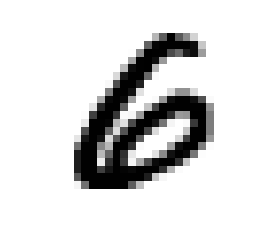

In [18]:
plt.imshow(a_digit_in_pixel_format, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [19]:
tar[39045]

6.0

In [20]:
# train a classifier to predict (classify) a 28 cross 28 pixel matrix's digit
# 28 X 28 pixel matrix => model (trained with MNIST dataset) => predicts a digit

#training dataset, test dataset
# MNIST (70000) => 60000 training dataset, 10000 test dataset
# training dataset => use to train a model
# test dataset => to determine the accuracy of the trained model

In [21]:
dat_training, dat_test, tar_training, tar_test = dat[:60000], dat[60000:], tar[:60000], tar[60000:]

In [22]:
tar_training[10], tar_training[10000], tar_training[20000], tar_training[15000], tar_training[26000]

(0.0, 1.0, 3.0, 2.0, 4.0)

In [23]:
tar_training

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [24]:
# binary classification (true if the number is 5, false if not)

tar_training_5 = (tar_training == 5)
tar_training_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_binary_classifier = SGDClassifier(random_state=42)
sgd_binary_classifier.fit(dat_training, tar_training_5) #two classes as output => (not multiclass classification)

C:\Users\Ajay Acharya\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [26]:
print(tar_test[7077] == 5)
print(tar_test[7077])

False
7.0


In [27]:
dat_test[7077]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 164, 187, 187, 10

In [28]:
sgd_binary_classifier.predict([dat_test[7077]])

array([False], dtype=bool)

In [30]:
tar_test[6000] == 5

True

In [31]:
sgd_binary_classifier.predict([dat_test[6000]])

array([ True], dtype=bool)

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_binary_classifier, dat_training, tar_training_5, cv=3, scoring="accuracy")

array([ 0.869  ,  0.83725,  0.90535])

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_binary_classifier, dat_training, tar_training_5, cv=2, scoring="accuracy")

array([ 0.86000467,  0.93439781])

In [34]:
from sklearn.model_selection import cross_val_predict

tar_training_5_predicted = cross_val_predict(sgd_binary_classifier, dat_training, tar_training_5, cv=3)

In [35]:
tar_training_5_predicted

array([False,  True, False, ..., False, False, False], dtype=bool)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(tar_training_5, tar_training_5_predicted)

array([[47700,  6879],
       [  889,  4532]], dtype=int64)

---------
TN | FP
--------
FN | TP
--------

True Negative (predicted the negative as negative) => 6 is predicted as false, 7 is predicted as false
False Positive (predicted the negative as positive) => 6 is predicted as true, 7 is predicted as true
False Negative (predicted the positive as negative) => 5 is predicted as false
True Positive (predicted the positive as positive) => 5 is predicted as true

[47700,  6879],
[  889,  4532]
       
- 47700 => correctly classified as non-5s
   6879 => wrongly classified as 5s
    889 => wrongly classified as non-5s
   4532 => correctly classified as 5s

perfect model

[54579,    0],
[    0, 5421]

worst model

[0   , 54579],
[5421,     0]

1. Precision => accuracy of positive predictions
    precision = TP / (TP + FP)
2. Recall => sensitivity => ratio of positive instances correctly detected(predicted)
    recall = TP / (TP + FN)
3. F1 score
    f1 = 2 / (1/pres + 1/recall)

In [40]:
from sklearn.metrics import precision_score, recall_score

precision_score(tar_training_5, tar_training_5_predicted)

0.39716063447550609

In [41]:
4532.00/ (4532.00 + 6879.00)

0.3971606344755061

In [42]:
recall_score(tar_training_5, tar_training_5_predicted)

0.83600811658365615

In [38]:
4532 / (4532 + 889)

0.8360081165836561

In [43]:
from sklearn.metrics import f1_score
f1_score(tar_training_5, tar_training_5_predicted)

0.53849809885931554

In [44]:
2 / (1/0.5 + 1/0.5)

0.5

Multiple classes => Random Forest classifiers, naive Bayes classifiers
Binary classes => Support Vector Machine classifiers, Linear classifiers

1. One-versus-all or one-versus-the-rest => 10 binary classifiers (0-binary, 1-binary, ... like the 5-one that we built)
2. One versus-one

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state=42)
cross_val_predict(forest_classifier, dat_training, tar_training_5, cv=3)

array([False, False, False, ..., False, False, False], dtype=bool)

In [46]:
tar_training

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [48]:
sgd_binary_classifier_one_vs_all = SGDClassifier(random_state=42)
sgd_binary_classifier_one_vs_all.fit(dat_training, tar_training) #multiclass classification)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [49]:
sgd_binary_classifier_one_vs_all.predict([dat_test[7077]])

array([ 7.])

In [50]:
sgd_binary_classifier_one_vs_all.predict([dat_test[6000]])

array([ 5.])

In [51]:
sgd_binary_classifier_one_vs_all.decision_function([dat_test[7077]])

array([[-226457.97714271, -315173.64074935, -173434.00183894,
        -230906.92417541, -209337.3268902 , -349882.45806106,
        -528378.2894124 ,  183734.56791042, -457958.89688229,
        -108847.6832562 ]])

In [52]:
sgd_binary_classifier_one_vs_all.decision_function([dat_test[6000]])

array([[-185361.26253568, -245285.66769961, -141101.73495432,
        -299697.48494139,  -94839.1059659 ,   10633.45727418,
        -397236.55804453, -153767.749373  ,  -75467.49325638,
        -200833.13835738]])

In [53]:
sgd_binary_classifier_one_vs_all.decision_function([dat_test[1234]])

array([[-416546.28308392,  129682.82056778,   27428.99106137,
        -210287.85235126, -151041.28603958, -266724.87281993,
        -146562.76843061, -313201.16941759,  -41701.79968265,
        -215319.03365936]])

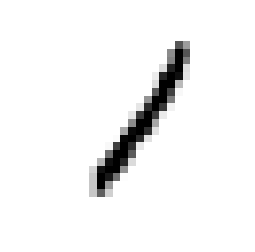

In [54]:
a_digit = dat_test[1234]
a_digit_in_pixel_format = a_digit.reshape(28, 28) #784 is going to be reshaped into a 28 cross 28 matrix
a_digit_in_pixel_format
plt.imshow(a_digit_in_pixel_format, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [55]:
from sklearn.multiclass import OneVsOneClassifier
one_vs_one = OneVsOneClassifier(SGDClassifier(random_state=42))
one_vs_one.fit(dat_training, tar_training)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [56]:
one_vs_one.decision_function([dat_test[1234]])

array([[-0.5       ,  9.37160186,  7.30120168,  5.1112194 ,  2.97178216,
         1.63478737,  2.8729616 ,  5.00309173,  7.44138933,  3.79196486]])

In [57]:
from PIL import Image
import numpy as np

Classifying people in picture(Jef, Mithul,  Ajay)
1. [1,0,1]
2. [0,1,1]
3. [1,1,0]

# Multi label Classification

In [58]:
#markthe num more than 6 as true else false
tar_training_larger_than_6= (tar_training>6)
tar_training_larger_than_6

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [59]:
# mark the num odd as true else false
tar_training_odd_num = (tar_training % 2==1)
tar_training_odd_num

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [60]:
# mark the num odd as true else false
tar_training_num_6 = (tar_training == 6)
tar_training_num_6

array([False, False, False, ..., False, False, False], dtype=bool)

In [62]:
import numpy as np
tar_multilabel = np.c_[tar_training_larger_than_6, tar_training_odd_num, tar_training_num_6]

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier= KNeighborsClassifier()
knn_classifier.fit(dat_training, tar_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
a_digit= dat_test[1234]
knn_classifier.predict([a_digit])

array([[False,  True, False]], dtype=bool)

In [ ]:
tar_training_knn_predict = cross_val_predict(knn_classifier dat_training, tar_multilabel)

In [ ]:
tar_training_knn_predict = cross_val_predict(knn_classifier, dat_training, tar_multilabel)
ii

In [ ]:
#f1_score(tar_m, tar_trai, average='macro')

# MultiOutput Classification
#### Multioutput multiclass classification

##### Movie rating system(user, critics, actors)
##### multilabel example(good, bad, good)
#####  multioutput example (3,8,7)
##### multioutput complex (8/10, very bad, 9/20)

#### binary-> multiclass-> multilabel-> multioutput



In [67]:
noise= np.random.randint()
dat_training_noise = dat_training+ noise

noise= np.random.randint()
tar_training_noise = dat_training

knn_classifier.fit(dat_training_noise, tar_training_noise)
knn_classifier.predict([noise digit])

SyntaxError: invalid syntax (<ipython-input-67-1931e81ca90a>, line 8)

# SVM creates a street between the points to seperate the points (Least close points between them)
### points that help to create the street is SVM vectors



In [ ]:
#### c hyper parameter
soft margin vs hard margin classifier
